In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten
import tensorflow as tf
from tensorflow import keras

In [12]:
def end_to_end_data_prep():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    from glob import glob
    from PIL import Image
    %matplotlib inline
    base = '/cxldata/skin_disease_1/'
    metadata = pd.read_csv(os.path.join(base,'HAM10000_metadata_orig.csv'))
    #metadata.info()
    #if we combine data into one directory then no need to mention *
    image_path = {os.path.splitext(os.path.basename(x))[0]: x
                  for x in glob(os.path.join('/cxldata/skin_disease_1/HAM10000_images_draftv1/orig/','*.jpg'))}
    metadata['path'] = metadata['image_id'].map(image_path.get)
    #upload data into dataset with resize 254,254
    #metadata['image'] = metadata['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
    
    return metadata

In [13]:
metadata_all = end_to_end_data_prep()


In [ ]:
# first import all data into dataframe then run train_test_split function to split data

# total samples are 42650
# split with train_test_split (stratify = y,test 0.2 size)
# train  - 34120
#test - 8530

In [ ]:
# save train data into csv to overcome processing again n again( 34120 records)
train.to_csv('/cxldata/skin_disease_1/sudeep/sudeep_train.csv')

In [ ]:
# save test data into csv to overcome processing again n again ( 8530 records)

test.to_csv('/cxldata/skin_disease_1/sudeep/sudeep_test.csv')

In [3]:
# import train data (34120 records)
import pandas as pd
train_df = pd.read_csv('/cxldata/skin_disease_1/sudeep/sudeep_train.csv')

In [4]:
# import test data ( 8530 records)
import pandas as pd 
test_df = pd.read_csv('/cxldata/skin_disease_1/sudeep/sudeep_test.csv')

In [5]:
# created another df because we are not able to run fit model on 34120 records so created another df with 12000 recods
train_df1 = train_df[0:12000]

In [6]:
train_df1.shape

(12000, 11)

In [7]:
# data is stratified in new data frame
train_df1['dx'].value_counts()

mel      1830
nv       1820
bkl      1770
df       1766
vasc     1764
akiec    1592
bcc      1458
Name: dx, dtype: int64

In [8]:
len(train_df1)

12000

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530 entries, 0 to 8529
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8530 non-null   int64  
 1   Unnamed: 0.1  8530 non-null   int64  
 2   lesion_id     1996 non-null   object 
 3   image_id      8530 non-null   object 
 4   dx            8530 non-null   object 
 5   dx_type       8530 non-null   object 
 6   age           1985 non-null   float64
 7   sex           8530 non-null   object 
 8   localization  8530 non-null   object 
 9   dataset       8530 non-null   object 
 10  path          8530 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 733.2+ KB


In [11]:
len(test_df)

8530

In [15]:
train_df1['path'][0]

'/cxldata/skin_disease_1/HAM10000_images_draftv1/akiec1/akiec_0_6806.jpg'

In [13]:
test_df['path'][0]

'/cxldata/skin_disease_1/HAM10000_images_draftv1/bkl2/bkl_0_7689.jpg'

In [16]:
train_df1

,Unnamed: 0,Unnamed: 0.1,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path
0,13481,13481,NaN,akiec_0_6806,akiec,histo,NaN,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
1,14323,14323,NaN,akiec_0_7555,akiec,histo,NaN,female,back,rosendahl,/cxldata/skin_disease_1/HAM10000_images_draftv...
2,41377,41377,NaN,vasc_0_1955,vasc,histo,NaN,male,lower extremity,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
3,38669,38669,NaN,vasc_0_6309,vasc,histo,NaN,male,back,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
4,37655,37655,NaN,vasc_0_3636,vasc,histo,NaN,male,back,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
...,...,...,...,...,...,...,...,...,...,...,...
11995,1572,1572,HAM_0005010,ISIC_0033603,mel,histo,30.0,female,upper extremity,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
11996,41111,41111,NaN,vasc_0_7716,vasc,histo,NaN,male,trunk,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
11997,7964,7964,HAM_0004367,ISIC_0033396,nv,histo,80.0,male,back,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...
11998,34470,34470,NaN,mel_0_7760,mel,histo,NaN,female,foot,rosendahl,/cxldata/skin_disease_1/HAM10000_images_draftv...


In [17]:
train_image = []
for i in tqdm(range(train_df1.shape[0])):
    img = image.load_img(train_df1['path'][i],target_size=[64,64,3])
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)


100%|██████████| 12000/12000 [00:59<00:00, 201.66it/s]


In [18]:
from sklearn.preprocessing import OneHotEncoder
y = train_df1['dx'].values
onehotencoder = OneHotEncoder(categories='auto',sparse=False)
y = onehotencoder.fit_transform(y.reshape(-1,1))

In [19]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
X.shape

(12000, 64, 64, 3)

In [21]:
y.shape

(12000, 7)

In [22]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,stratify=y,test_size=0.2)

In [26]:
print(X_train.shape)
print(X_valid.shape)

(9600, 64, 64, 3)
(2400, 64, 64, 3)


In [27]:
print(y_train.shape)
print(y_valid.shape)

(9600, 7)
(2400, 7)


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
import tensorflow as tf
from tensorflow import keras
base_model = keras.applications.vgg16.VGG16(weights="imagenet",
                                                  include_top=False,input_shape = (64,64,3))
model_t1 = Sequential()
model_t1.add(base_model)
model_t1.add(Flatten())
model_t1.add(Dense(64,activation="relu"))
model_t1.add(Dense(7,activation="softmax"))
#avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
#output = keras.layers.Dense(7, activation="softmax")(avg)
#model = keras.models.Model(inputs=base_model.input, outputs=output)

In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
from keras import backend as K 
K.clear_session()

In [11]:
#optimizer = keras.optimizers.SGD(lr=0.2)
model_t1.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model_t1.fit(X_train,y_train,epochs=3,validation_data=(X_valid,y_valid)) #changed from 5

Epoch 1/3
300/300 [==============================] - 201s 668ms/step - loss: 0.8168 - accuracy: 0.7405 - val_loss: 0.5015 - val_accuracy: 0.8571
Epoch 2/3
300/300 [==============================] - 203s 679ms/step - loss: 0.4337 - accuracy: 0.8783 - val_loss: 0.3899 - val_accuracy: 0.8871
Epoch 3/3
300/300 [==============================] - 214s 714ms/step - loss: 0.3437 - accuracy: 0.9035 - val_loss: 0.3476 - val_accuracy: 0.9125


In [17]:
img_path = '/cxldata/skin_disease_1/HAM10000_images_draftv1/akiec/akiec_0_100.jpg'


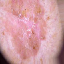

In [23]:
img = image.load_img(img_path,color_mode='rgb', target_size=(64, 64))
display(img)

In [24]:
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

In [26]:
x = preprocess_input(x)
features = model_t1.predict(x)
features
#p = decode_predictions(features)

array([[0.9952668 , 0.        , 0.        , 0.        , 0.00473323,
        0.        , 0.        ]], dtype=float32)

In [12]:
model_t1.save('/cxldata/skin_disease_1/sudeep/1/4_nadam.h5')

In [33]:
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [34]:
#return position of max
MaxPosition=np.argmax(features)  
prediction_label=classes[MaxPosition]
print(prediction_label) 

akiec


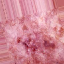

akiec


In [65]:
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
img_path1 = '/cxldata/skin_disease_1/HAM10000_images_draftv1/akiec2/akiec_0_9864.jpg'
img1 = image.load_img(img_path1,color_mode='rgb', target_size=(64, 64))
display(img1)
x1 = image.img_to_array(img1)
x1.shape
# Adding the fouth dimension, for number of images
x1 = np.expand_dims(x1, axis=0)

x1 = preprocess_input(x1)
features1 = model_t1.predict(x1)
features1
#p = decode_predictions(features)
MaxPosition=np.argmax(features1)  
prediction_label=classes[MaxPosition]
print(prediction_label) 

In [49]:
features1

array([[1.0000000e+00, 3.0424418e-28, 0.0000000e+00, 0.0000000e+00,
        2.4646536e-20, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [40]:
MaxPosition

0

In [28]:
model = keras.models.load_model('/cxldata/skin_disease_1/sudeep/1/4_nadam.h5')

In [29]:
# for test dataset
train_image = []
for i in tqdm(range(test_df.shape[0])):
    img = image.load_img(test_df['path'][i],target_size=[64,64,3])
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X_test = np.array(train_image)

100%|██████████| 8530/8530 [00:44<00:00, 192.01it/s]


In [36]:
from sklearn.preprocessing import OneHotEncoder
y_test = test_df['dx'].values
onehotencoder = OneHotEncoder(categories='auto',sparse=False)
y_test = onehotencoder.fit_transform(y_test.reshape(-1,1))

In [37]:
print(X_test.shape)
print(y_test.shape)

(8530, 64, 64, 3)
(8530, 7)


In [38]:
test_df['dx'].value_counts()

nv       1341
mel      1302
df       1256
bkl      1253
vasc     1226
akiec    1121
bcc      1031
Name: dx, dtype: int64

In [39]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
67/67 [==============================] - 157s 2s/step - loss: 0.3456 - accuracy: 0.9089
test loss, test acc: [0.3455950915813446, 0.9089097380638123]
